# Fundamentos de Machine Learning
## Tarea semana 2 - Grupo Raccoons
- Michel Aycaguer
- Facundo Arias
- Christian Huelmo

In [2]:
#Importamos librerias y leemos el CSV con separador ";"
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

df = pd.read_csv('vgsalesv3.csv', sep=';')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
#Contamos y listamos los datos faltantes en las columnas del dataframe
missing_Data = df.isnull()

for column in missing_Data.columns.values.tolist():
    print(column)
    print (missing_Data[column].value_counts())
    print(" ")


Rank
False    16598
Name: Rank, dtype: int64
 
Name
False    16598
Name: Name, dtype: int64
 
Platform
False    16598
Name: Platform, dtype: int64
 
Year
False    16327
True       271
Name: Year, dtype: int64
 
Genre
False    16598
Name: Genre, dtype: int64
 
Publisher
False    16540
True        58
Name: Publisher, dtype: int64
 
NA_Sales
False    16598
Name: NA_Sales, dtype: int64
 
EU_Sales
False    16593
True         5
Name: EU_Sales, dtype: int64
 
JP_Sales
False    16594
True         4
Name: JP_Sales, dtype: int64
 
Other_Sales
False    16594
True         4
Name: Other_Sales, dtype: int64
 
Global_Sales
False    16592
True         6
Name: Global_Sales, dtype: int64
 


In [4]:
#Tomamos decisiones tomando en cuentta los datos faltantes
#Teniendo en cuenta que los datos faltantes en EU JP Other
#y Global sales son infimos en comparacion al total 
#decidimos borrarlos
#Los publishers vacios fueron cambiados a "Unknown"
#Y los años desconocidos cambiados por 0
df['Year'] = df['Year'].fillna(0)
df['Publisher'] = df['Publisher'].fillna('Unknown')
df = df.dropna(subset=['EU_Sales'])
df = df.dropna(subset=['JP_Sales'])
df = df.dropna(subset=['Other_Sales'])
df = df.dropna(subset=['Global_Sales']) 


In [5]:
df.count()

Rank            16579
Name            16579
Platform        16579
Year            16579
Genre           16579
Publisher       16579
NA_Sales        16579
EU_Sales        16579
JP_Sales        16579
Other_Sales     16579
Global_Sales    16579
dtype: int64

In [6]:
# Se divide el dataframe en dos mas pequeños (train de 80% y test de 20%) y se guardan como archivos CSV
train = df.sample(frac=0.8)
test = df.sample(frac=0.2)

train.to_csv('train.csv')
test.to_csv('test.csv')
train.count() + test.count()

Rank            16579
Name            16579
Platform        16579
Year            16579
Genre           16579
Publisher       16579
NA_Sales        16579
EU_Sales        16579
JP_Sales        16579
Other_Sales     16579
Global_Sales    16579
dtype: int64

In [7]:
#Importamos la libreria sklearn 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [30]:
#Extraemos las columnas que nos interesa estudiar, factorizando la columna plataforma para si poder utilizarla
df_clean = pd.concat([df['Global_Sales'],df['JP_Sales'],pd.get_dummies(df['Platform'])], axis=1 )

AttributeError: 'DataFrame' object has no attribute 'Genre'

In [9]:
# lo vemos
df_clean.head()

,Global_Sales,JP_Sales,2600,3DO,3DS,DC,DS,GB,GBA,GC,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
0,82.74,3.77,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,40.24,6.81,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,35.82,3.79,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,33.00,3.28,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,31.37,10.22,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#separamos la columna objetivo
genero = df['Genre']

In [11]:
#Con los df de train y objetivo, creamos los train y test con 80 20 de proporcion
X_train, X_test, Y_train, Y_test = train_test_split(df_clean, genero,
                                        train_size   = 0.8, random_state = 0
                                    )



In [12]:
#Creamos el modelo
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [13]:
#entrenamos el modelo con los df train
model.fit(X_train,Y_train)

RandomForestClassifier()

In [14]:
#Imprimimos la accuracy del modelo
model.score(X_test, Y_test)

0.20416164053075994

In [15]:
#Predecimos y almacenamos en Y_pred
Y_pred = model.predict(X_test)

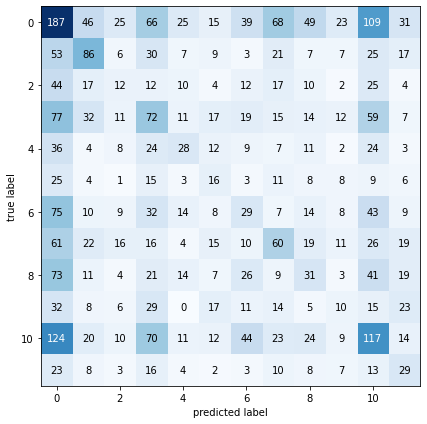

In [16]:
#Creamos la confusion matrix
matriz = confusion_matrix(Y_test, Y_pred)
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.tight_layout()

In [17]:
#####################################################################

In [18]:
from sklearn import tree

In [19]:
# Creamos el modelo de Arbol de Decisión 
Dt_model = tree.DecisionTreeClassifier()

In [20]:
X_train

,Global_Sales,JP_Sales,2600,3DO,3DS,DC,DS,GB,GBA,GC,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
8871,0.15,0.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7647,0.20,0.20,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9449,0.13,0.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7439,0.21,0.07,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15552,0.02,0.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9244,0.14,0.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13142,0.05,0.05,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9864,0.12,0.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10818,0.09,0.09,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
Y_train

8871           Racing
7647          Shooter
9449           Sports
7439     Role-Playing
15552       Adventure
             ...     
9244           Puzzle
13142       Adventure
9864             Misc
10818            Misc
2751           Action
Name: Genre, Length: 13263, dtype: object

In [22]:
#entrenamos el modelo
Dt_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [23]:
#vemos la accuaracy
Dt_model.score(X_test, Y_test)

0.19993968636911943

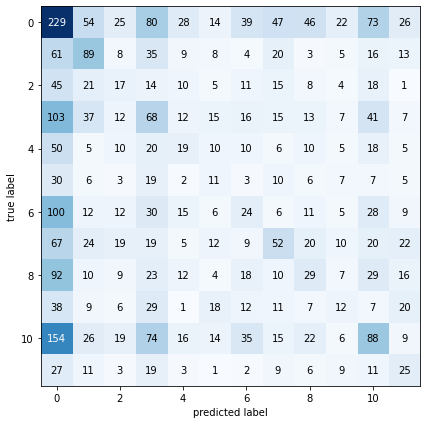

In [24]:
#Graficamos la confusion matrix
Y_pred = Dt_model.predict(X_test)
matriz = confusion_matrix(Y_test,Y_pred)

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.tight_layout()

In [25]:
# Pudimos generar un modelo, siempre y cuando factorizaramos la columna Platform,
# y tambien utilizando solo las columnas con tipo numerico.
# Vimos que factorizando con ciertas funciones generaba confusion matrix que no eran del todo acertadas
# por eso utilizamos la funcion get dummies con la cual generamos unas confusion matrix que parecen mas coherentes.
# segun el score de cada uno, podemos decir que la prediccion no es buena.